In [1]:
import os
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd # version >= 0.18.2 ! 

pd.options.display.width = 100
pd.options.display.max_colwidth = 100

/home/wpe/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Read data

In [2]:
data_path = '../data/'

training_data_path = os.path.join(data_path, 'train')
training_data_ids = range(1, 11)

test_data_path = os.path.join(data_path, 'test')
test_data_ids = range(1, 6)

data_prefix_train_calcium = 'train_calcium_'
data_prefix_train_spike = 'train_spikes_'
data_prefix_test_calcium = 'test_calcium_'

In [3]:
training_sets_calcium = {}
training_sets_spikes = {}

for training_data_num in training_data_ids:
    training_calcium = pd.read_csv(
        os.path.join(training_data_path, data_prefix_train_calcium + str(training_data_num) + '.csv'))
    training_spikes = pd.read_csv(
        os.path.join(training_data_path, data_prefix_train_spike + str(training_data_num) + '.csv'))
    
    # column indices: int instead of string
    training_calcium.columns = training_calcium.columns.astype(int)
    training_spikes.columns = training_spikes.columns.astype(int)
    
    training_sets_calcium[training_data_num] = training_calcium
    training_sets_spikes[training_data_num] = training_spikes

In [4]:
test_sets_calcium = {}

for test_data_num in test_data_ids:
    test_calcium = pd.read_csv(os.path.join(test_data_path, data_prefix_test_calcium + str(test_data_num) + '.csv' ))
    test_calcium.columns = test_calcium.columns.astype(int)
    test_sets_calcium[test_data_num] = test_calcium

## Calculate and print descriptive statistics

In [40]:
?pd.DataFrame.describe()

In [5]:
def get_calcium_statistics(dataset):
    descriptive_stats = dataset.describe().transpose()
    descriptive_stats['NaN'] = dataset.isnull().sum(0)
    return descriptive_stats

def get_spike_statistics(dataset):
    value_counts_of_spikes = []
    
    for neuron_id in dataset.columns:
        neuron_column_as_str = dataset[neuron_id].astype(str)
        value_counts = pd.DataFrame(neuron_column_as_str.value_counts())
        value_counts.index = value_counts.index.astype(float)
        value_counts_of_spikes.append(value_counts)
    
    spike_statistics = pd.concat(value_counts_of_spikes, axis=1).transpose()
    spike_statistics = spike_statistics.fillna(0.0)
    spike_statistics = spike_statistics.astype(int)
    
    return spike_statistics

def print_dataset_name(dataset_id):
    print '\n--- Dataset [{}] ---'.format(i)

def print_shape(dataset):
    print '# timesteps:\t', dataset.shape[0]
    print '# neurons:\t', dataset.shape[1]

def print_statistics_df(statistics_df, name):
    print '\n' + name
    print statistics_df

### Training data

In [6]:
calcium_statistics_train = {}
spike_statistics_train = {}

for i in training_data_ids:
    training_calcium = training_sets_calcium[i]
    training_spikes = training_sets_spikes[i]
    
    calcium_statistics_per_neuron = get_calcium_statistics(training_calcium)
    spike_statistics_per_neuron = get_spike_statistics(training_spikes)
    
    print_dataset_name(i)
    print_shape(training_calcium) # shape same as training_spikes
    print_statistics_df(calcium_statistics_per_neuron, 'Statistics of calcium traces per neuron:')
    print_statistics_df(spike_statistics_per_neuron, 'Statistics of spike rates per neuron:')
    
    calcium_statistics_train[i] = calcium_statistics_per_neuron
    spike_statistics_train[i] = spike_statistics_per_neuron

/home/wpe/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)



--- Dataset [1] ---
# timesteps:	71986
# neurons:	11

Statistics of calcium traces per neuron:
      count      mean       std       min       25%       50%       75%       max    NaN
0   71986.0  0.646770  0.444488 -0.685101  0.332417  0.603039  0.915306  3.134580      0
1   71986.0  0.651609  0.420958 -0.808990  0.351114  0.632649  0.927438  2.641432      0
2   35993.0  0.662335  0.452687 -0.763746       NaN       NaN       NaN  3.058852  35993
3   71985.0  0.653130  0.463706 -0.608734       NaN       NaN       NaN  4.287273      1
4   71986.0  0.671513  0.614759 -0.499646  0.274208  0.524246  0.879348  4.399176      0
5   71986.0  0.653020  0.452244 -0.757015  0.336880  0.605626  0.915782  3.670119      0
6   71986.0  0.679811  0.479134 -1.225060  0.387669  0.624212  0.912361  5.232165      0
7   71985.0  0.658057  0.640691 -0.532283       NaN       NaN       NaN  4.586872      1
8   71986.0  0.659958  0.483874 -0.865865  0.331718  0.592295  0.906697  3.545957      0
9   59717.0  0

In [27]:
training_spikes.mean()

0     0.073826
1     0.009502
2     0.010971
3     0.001220
4     0.000970
5     0.008699
6     0.006258
7     0.012579
8     0.026821
9     0.029078
10    0.033143
11    0.022110
12    0.032097
13    0.022335
14    0.002438
15    0.021965
16    0.002133
17    0.003688
18    0.002969
19    0.001156
20    0.009136
21    0.011701
22    0.011357
23    0.022117
24    0.005569
25    0.005131
26    0.014298
dtype: float64

In [21]:
training_spikes.mean()

pandas.core.series.Series

In [36]:
pd.DataFrame({"calc":training_sets_calcium[7].mean(), "spike": training_sets_spikes[7].mean()}).corr()

calc     spike
calc   1.000000  0.323657
spike  0.323657  1.000000

In [9]:
training_spikes

0   1   2    3    4    5    6    7    8    9  ...   17  18  19   20   21   22   23   24  \
0       0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
1       0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
2       0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
3       0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
4       0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
5       0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
6       0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
7       1   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
8       1   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
9       0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
10      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
11      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
12      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
13      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
14      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
15      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
16      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
17      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
18      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
19      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
20      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
21      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
22      1   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
23      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
24      1   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
25      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
26      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
27      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
28      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
29      0   0   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    0   0   0  0.0  0.0  0.0  0.0  0.0   
...    ..  ..  ..  ...  ...  ...  ...  ...  ...  ... ...   ..  ..  ..  ...  ...  ...  ...  ...   
31964   0   0   0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    0   0   0  NaN  NaN  NaN  0.0  0.0   
31965   0   0   0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    0   0   0  NaN  NaN  NaN  0.0  NaN   
31966   0   0   0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    0   0   0  NaN  NaN  NaN  NaN  NaN   
31967   0   0   0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    0   0   0  NaN  NaN  NaN  NaN  NaN   
31968   0   0   0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    0   0   0  NaN  NaN  NaN  NaN  NaN   
31969   0   0   0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    0   0   0  NaN  NaN  NaN  NaN  NaN   
31970   0   0   0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    0   0   0  NaN  NaN  NaN  NaN  NaN   
31971   0   0   0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    0   0   0  NaN  NaN  NaN  NaN  NaN   
31972   0   0   0  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...    0   0   0  NaN  NaN  NaN  N

### Test data

In [7]:
calcium_statistics_test = {}

for i in test_data_ids:
    test_calcium = test_sets_calcium[i]
    
    calcium_statistics_per_neuron = get_calcium_statistics(test_calcium)
    
    print_dataset_name(i)
    print_shape(test_calcium)
    print_statistics_df(calcium_statistics_per_neuron, 'Statistics of calcium traces per neuron:')
    
    calcium_statistics_test[i] = calcium_statistics_per_neuron


--- Dataset [1] ---
# timesteps:	71984
# neurons:	5

Statistics of calcium traces per neuron:
     count      mean       std       min       25%       50%       75%       max    NaN
0  71984.0  0.627144  0.466272 -0.473160  0.294164  0.546546  0.896004  3.109550      0
1  35992.0  0.664464  0.460891 -1.301645  0.356469  0.620102  0.916813  3.931273  35992
2  71984.0  0.642765  0.472630 -0.586395  0.310376  0.566956  0.896352  3.044190      0
3  71984.0  0.675868  0.594842 -0.639670  0.297930  0.555477  0.893681  5.092111      0
4  71984.0  0.699707  0.632943 -0.722420  0.305717  0.558070  0.886406  4.502474      0

--- Dataset [2] ---
# timesteps:	77873
# neurons:	10

Statistics of calcium traces per neuron:
     count      mean       std        min       25%       50%       75%        max    NaN
0  77873.0  0.660107  0.400145  -1.010818  0.392064  0.661120  0.931456   2.405855      0
1  34667.0  0.684642  0.506152  -0.870981  0.358928  0.623618  0.920601   4.154085  43206
2  69617.0 

### Plotting

In [8]:
def plot_input_is_valid(dataset_id, neuron_id, time_range_limits):
    
    if dataset_id not in training_data_ids:
        print 'No dataset numbered {}; possible values are {}'.format(dataset_id, training_data_ids)
        return False
       
    calcium_data = training_sets_calcium[dataset_id]
    
    if neuron_id not in calcium_data.columns:
        print 'No neuron numbered {}; possible values are {}'.format(neuron_id, calcium_data.columns.tolist())
        return False
    
    if time_range_limits[1] < time_range_limits[0]:
        print 'End of given time range ({}) is before the start ({})'.format(time_range_limits[1], time_range_limits[0])
        return False
    
    if time_range_limits[0] > len(calcium_data):
        print 'No values after time step {}; range limits are {}'.format(time_range_limits[0], [0, len(calcium_data)])
        return False
    
    return True

def plot_chunk_of_data(dataset_id, neuron_id, time_range_limits):
    time_start, time_end = time_range_limits

    calcium_values = training_sets_calcium[dataset_id][neuron_id][time_start:time_end]
    spike_values = training_sets_spikes[dataset_id][neuron_id][time_start:time_end]
    x = np.arange(time_start, time_end)

    plt.figure(figsize=(15, 3))
    plt.plot(x, calcium_values, color=(.1, .6, .4))
    plt.plot(x, spike_values / 2.0 - 1, color='k')
    
    plt.xlabel('Time')
    plt.ylabel('Calcium')
    plt.xlim(time_range_limits)

    ylim_max = max(4.0, calcium_values.max())
    ylim_min = min(-2.0, calcium_values.min())
    plt.ylim([ylim_min, ylim_max])

    plt.grid()
    plt.show()
    
def plot_training_data_continuously(dataset_id, neuron_id, time_range_limits):
    
    def shift_time_range_limits(time_range_limits):
        time_range_size = time_range_limits[1] - time_range_limits[0]
        return [limit + time_range_size for limit in time_range_limits]
    
    if plot_input_is_valid(dataset_id, neuron_id, time_range_limits):
        print 'Dataset #{}, neuron #{} (press x for exit, anything else to )'.format(dataset_id, neuron_id)
        plot_chunk_of_data(dataset_id, neuron_id, time_range_limits)
        
        while raw_input() != 'x':
            time_range_limits = shift_time_range_limits(time_range_limits)
            plot_chunk_of_data(dataset_id, neuron_id, time_range_limits)

Dataset #10, neuron #2 (press x for exit, anything else to )


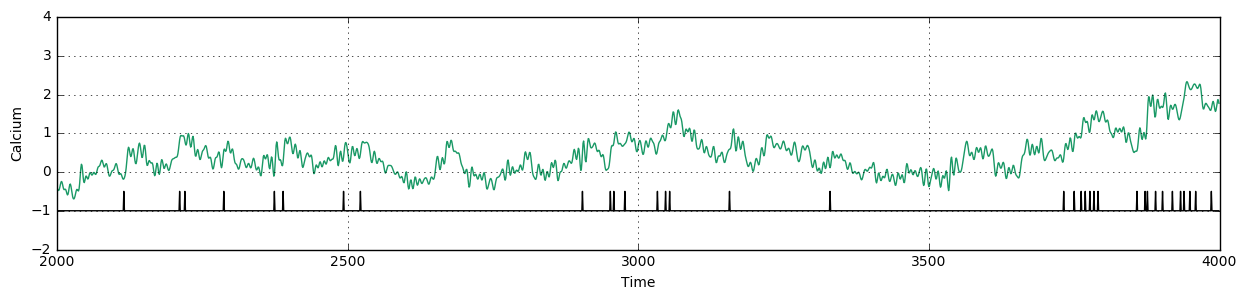

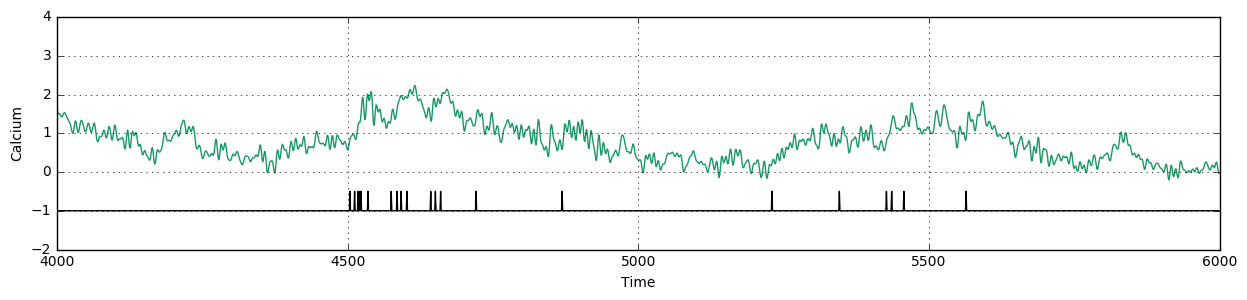

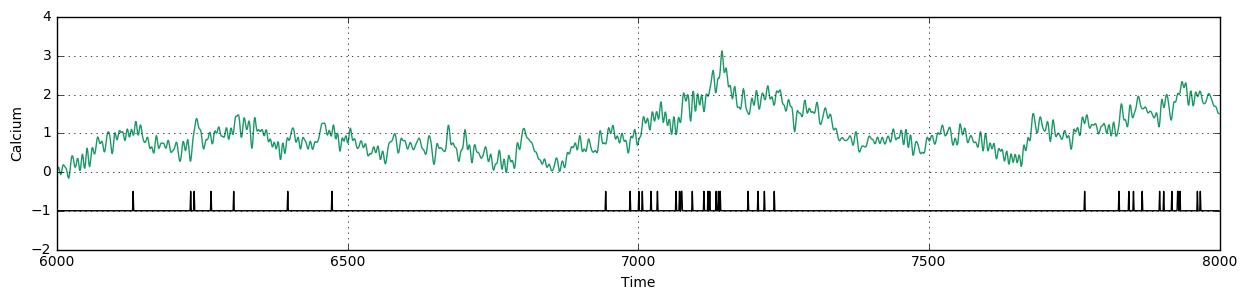

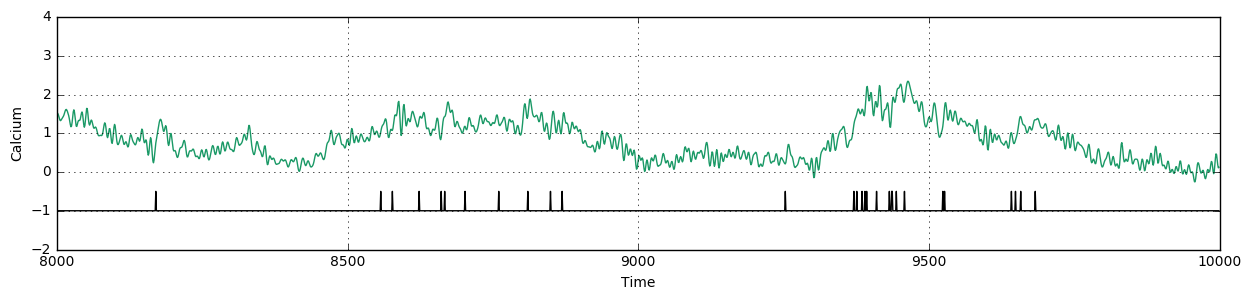

x


In [9]:
plot_training_data_continuously(dataset_id=10, neuron_id=2, time_range_limits=[2000, 4000])

In [ ]:
pd.DataFrame({"calc":training_sets_calcium[7].mean(), "spike": training_sets_spikes[7].mean()}).corr()

## Merge all data

In [5]:
df = pd.DataFrame()
for i in range(1,11):
    for c in training_sets_calcium[i].columns:
        df = df.append(pd.DataFrame({"set": i,"neuron": c, "time":training_sets_calcium[i].index , "calcium":training_sets_calcium[i][c],"spike":training_sets_spikes[i][c]}))

In [7]:
data = (df.dropna())[['set', 'neuron', 'time', 'calcium', 'spike']]

In [9]:
data['is_spike'] = np.where(data['spike']>0, 1, 0)

In [10]:
data.corr()

set    neuron      time   calcium     spike  is_spike
set       1.000000  0.336005 -0.390825  0.039244 -0.043538 -0.046928
neuron    0.336005  1.000000 -0.165527  0.017918 -0.042019 -0.043790
time     -0.390825 -0.165527  1.000000 -0.028637  0.015875  0.016146
calcium   0.039244  0.017918 -0.028637  1.000000  0.075889  0.078688
spike    -0.043538 -0.042019  0.015875  0.075889  1.000000  0.959463
is_spike -0.046928 -0.043790  0.016146  0.078688  0.959463  1.000000

In [13]:
maxtimes_df = data[['set', 'neuron', 'time']].groupby(['set', 'neuron']).max().reset_index()
maxtimes_df.columns = ['set', 'neuron', 'max_time']

In [14]:
more_data = pd.merge(data,maxtimes_df, on=['set', 'neuron'])

In [15]:
more_data['calc_b_10'] = more_data['calcium'].shift(10)
more_data['calc_b_9'] = more_data['calcium'].shift(9)
more_data['calc_b_8'] = more_data['calcium'].shift(8)
more_data['calc_b_7'] = more_data['calcium'].shift(7)
more_data['calc_b_6'] = more_data['calcium'].shift(6)

In [16]:
more_data['calc_b_5'] = more_data['calcium'].shift(5)
more_data['calc_b_4'] = more_data['calcium'].shift(4)
more_data['calc_b_3'] = more_data['calcium'].shift(3)
more_data['calc_b_2'] = more_data['calcium'].shift(2)
more_data['calc_b_1'] = more_data['calcium'].shift(1)

In [17]:
more_data['calc_a_10'] = more_data['calcium'].shift(-10)
more_data['calc_a_9'] = more_data['calcium'].shift(-9)
more_data['calc_a_8'] = more_data['calcium'].shift(-8)
more_data['calc_a_7'] = more_data['calcium'].shift(-7)
more_data['calc_a_6'] = more_data['calcium'].shift(-6)
more_data['calc_a_5'] = more_data['calcium'].shift(-5)
more_data['calc_a_4'] = more_data['calcium'].shift(-4)
more_data['calc_a_3'] = more_data['calcium'].shift(-3)
more_data['calc_a_2'] = more_data['calcium'].shift(-2)
more_data['calc_a_1'] = more_data['calcium'].shift(-1)

In [45]:
more_data['calc_a_30'] = more_data['calcium'].shift(-30)
more_data['calc_a_29'] = more_data['calcium'].shift(-29)
more_data['calc_a_28'] = more_data['calcium'].shift(-28)
more_data['calc_a_27'] = more_data['calcium'].shift(-27)
more_data['calc_a_26'] = more_data['calcium'].shift(-26)
more_data['calc_a_25'] = more_data['calcium'].shift(-25)
more_data['calc_a_24'] = more_data['calcium'].shift(-24)
more_data['calc_a_23'] = more_data['calcium'].shift(-23)
more_data['calc_a_22'] = more_data['calcium'].shift(-22)
more_data['calc_a_21'] = more_data['calcium'].shift(-21)

In [46]:
data_features = more_data[ (more_data['time']>10) & ((more_data['max_time']-more_data['time'])>30)]

In [47]:
data_features.shape

(5144018, 47)

In [60]:
(data_features[data_features['set']==10].corr())['is_spike'].sort_values()

max_time    -0.041507
neuron      -0.038551
time        -0.010861
calc_b_10    0.074920
calc_b_9     0.077585
calc_b_8     0.080802
calc_b_7     0.084204
calc_b_6     0.087571
calc_b_5     0.091278
calc_b_4     0.096456
calc_b_3     0.104637
calc_b_2     0.116998
calc_b_1     0.133591
calcium      0.153016
calc_a_30    0.172736
calc_a_1     0.172775
calc_a_29    0.174815
calc_a_28    0.176860
calc_a_27    0.179053
calc_a_26    0.181497
calc_a_25    0.184106
calc_a_24    0.186642
calc_a_23    0.188872
calc_a_2     0.190183
calc_a_22    0.190746
calc_a_21    0.192454
calc_a_20    0.194305
calc_a_19    0.196519
calc_a_18    0.199082
calc_a_17    0.201767
calc_a_3     0.203351
calc_a_16    0.204312
calc_a_15    0.206604
calc_a_14    0.208728
calc_a_13    0.210845
calc_a_4     0.211757
calc_a_12    0.213002
calc_a_11    0.215037
calc_a_5     0.216152
calc_a_10    0.216681
calc_a_9     0.217757
calc_a_6     0.217936
calc_a_8     0.218296
calc_a_7     0.218407
spike        0.932193
is_spike  

In [50]:
data_features.to_csv("merged_data_with_features.csv", header=True, index=False)